In [26]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [27]:
########## KERAS 를 이용한 BMI 신경망 학습 ###############


from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
import pandas as pd, numpy as np
# BMI 데이터를 읽어 들이고 정규화하기
csv = pd.read_csv("C:/Users/손은주/Multicampus/part2/dataset/bmi.csv")
csv.head()

,label,height,weight
0,normal,188,71
1,fat,161,68
2,thin,178,52
3,fat,136,63
4,normal,145,52


In [28]:
# 데이터 정규화

csv["weight"] /=100
csv['height'] /=200

#레이블을 정수벡터 변환
bclass = {"thin":[1,0,0],"normal":[0,1,0],"fat":[0,0,1]}
y=np.empty((20000,3))

In [29]:
for i,v in enumerate(csv["label"]):
    y[i] = bclass[v]
    
#학습데이터와 테스트 데이터로 분리
X=csv[["weight","height"]].values
X_train,y_train = X[1:15001],y[1:15001]
X_test,y_test = X[15001:20001],X[15001:20001]

In [30]:
# 모델 구조 정의
model = Sequential()
model.add(Dense(512, input_shape=(2,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(3))
model.add(Activation('softmax'))

# 모델 구축
model.compile(loss='categorical_crossentropy', optimizer="rmsprop",
            metrics=["accuracy"])

# 데이터 훈련
hist = model.fit(X_train, y_train, batch_size=100, nb_epoch=20,
                validation_split=0.1,
                callbacks=[EarlyStopping(monitor='val_loss', patience=2)],
                verbose=1)

# 테스트 데이터로 평가
score = model.evaluate(X_test, y_test)
print("loss=", score[0])
print("accuracy=", score[1])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 13500 samples, validate on 1500 samples
Epoch 1/20
13500/13500 [==============================] - 1s 105us/step - loss: 0.5081 - accuracy: 0.7992 - val_loss: 0.2710 - val_accuracy: 0.9060
Epoch 2/20
13500/13500 [==============================] - 1s 91us/step - loss: 0.2493 - accuracy: 0.9044 - val_loss: 0.1751 - val_accuracy: 0.9380
Epoch 3/20
13500/13500 [==============================] - 1s 92us/step - loss: 0.1887 - accuracy: 0.9240 - val_loss: 0.1224 - val_accuracy: 0.9733
Epoch 4/20
13500/13500 [==============================] - 1s 89us/step - loss: 0.1564 - accuracy: 0.9325 - val_loss: 0.1317 - val_accuracy: 0.9413
Epoch 5/20
13500/13500 [==============================] - 1s 89us/step - loss: 0.1516 - accuracy: 0.9335 - val_loss: 0.1016 - val_accuracy: 0.9640
Epoch 6/20
13500/13500 [==============================] - 1s 90us/step - loss: 0.1342 - accuracy: 0.9436 - val_loss: 0.0999 - val_accuracy: 0.9560
Epoch 7/20
13500/13500 [==============================] - 1s 90us/st

ValueError: Error when checking target: expected activation_24 to have shape (3,) but got array with shape (2,)

In [33]:
#### 최소제곱법을 이용한 공부시간과 성적의 선형회귀 기울기, 절편 구하기 실습 #####

x = [2,4,6,8]
y = [81, 93, 91, 97]

mx = np.mean(x)
my = np.mean(y)

# 최소제곱법의 기울기 공식
divisor = sum([(mx-i)**2 for i in x])
dividend = sum([(x[i]-mx)*(y[i]-my) for i in range(len(x))])
print(divisor)
print(dividend)

20.0
46.0


In [34]:
# 기울기
a = dividend/divisor
# 절편
b= my - (mx*a)

print(a)
print(b)

2.3
79.0


In [36]:
#### 선형회귀의 평균 제곱 오차 구하기 #############
# 최소 제곱법으로 기울기와 절편을 구할 수 없는 경우 임의의 절편과 기울기에서 예측된 값과
# 실제값의 오차를 구해서 오차를 줄이는 방향으로 기울기, 절편을 수정하기 위해
# 오차 계산
###############################################
# 임의의 기울기와 절편
a_b = [3,76]
data=[[2,81],[4,93],[6,91],[8,97]]
x= [i[0] for i in data]
y= [i[1] for i in data]

# 예측값
predict= [a_b[0]*i + a_b[1] for i in x]

# 평균 제곱 오차
mse = np.mean([(predict[i] - y[i])**2 for i in range(len(x))])
print("평균 제곱 오차: ",mse)

평균 제곱 오차:  11.0


### 경사하강법 실습

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.show()

<Figure size 800x500 with 1 Axes>

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


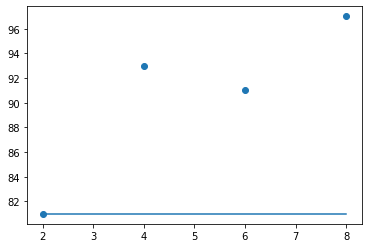

In [41]:
X_data = np.array(x)
y_data = np.array(y)

a=0 #기울기 a를 0으로 초기화
b=0 #절편 b를 0으로 초기화

lr = 0.03        #학습률 
epochs = 2001

 
for i in range(epochs):
    y_pred = a * X_data + b  #이차함수의 한 점에서의 순간 기울기
    error = y_data - y_pred    #오차
    #오차 함수를 a로 미분
    a_diff = -(2/len(X_data)) * sum(X_data *(error))
    #오차 함수를 b로 미분
    b_diff = -(2/len(X_data)) * sum(error)
    #학습률을 곱해서 a값 업데이트
    a= a-lr*a_diff 
    #학습률을 곱해서 b값 업데이트
    b= b-lr*b_diff   
 
    if i%100==0: 
         print('epoch=%.f, 기울기=%.04f, 절편=%.04f' % (i, a, b))

y_pred = a * X_data + b
 
plt.scatter(x, y)
plt.plot([min(X_data), max(X_data)], [min(y_data), min(y_data)])
plt.show()		

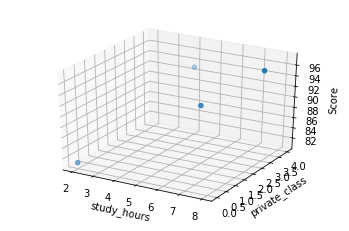

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

 
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

 
ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist = 11 
ax.scatter(x1, x2, y)
plt.show()


In [43]:
#x와 y값을 넘파이 배열로 변환
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)
# 기울기 a와 절편 b의 값을 초기화  
a1 = 0
a2 = 0
b = 0
#학습률 
lr = 0.03 
#수행 횟수
epochs = 2001 
#경사 하강법 수행
for i in range(epochs):  
    y_pred = a1 * x1_data + a2 * x2_data + b   
    error = y_data - y_pred  #오차 
    a1_diff = -(1/len(x1_data)) * sum(x1_data * (error)) # 오차함수를 a1로 미분한 값  
    a2_diff = -(1/len(x2_data)) * sum(x2_data * (error)) # 오차함수를 a2로 미분한 값  
    b_new = -(1/len(x1_data)) * sum(y_data - y_pred)  # 오차함수를 b로 미분한 값  
    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1값을 업데이트 
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2값을 업데이트 
    b = b - lr * b_new  # 학습률을 곱해 기존의 b값을 업데이트 
    if i % 100 == 0:    # 100번 반복될 때마다 현재의 a1, a2, b값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))


epoch=0, 기울기1=13.9200, 기울기2=6.3375, 절편=2.7150
epoch=100, 기울기1=8.3148, 기울기2=4.6327, 절편=31.0827
epoch=200, 기울기1=5.7281, 기울기2=3.7455, 절편=48.8273
epoch=300, 기울기1=4.1241, 기울기2=3.1917, 절편=59.8402
epoch=400, 기울기1=3.1286, 기울기2=2.8480, 절편=66.6752
epoch=500, 기울기1=2.5108, 기울기2=2.6347, 절편=70.9172
epoch=600, 기울기1=2.1273, 기울기2=2.5023, 절편=73.5500
epoch=700, 기울기1=1.8893, 기울기2=2.4201, 절편=75.1840
epoch=800, 기울기1=1.7416, 기울기2=2.3691, 절편=76.1981
epoch=900, 기울기1=1.6500, 기울기2=2.3375, 절편=76.8275
epoch=1000, 기울기1=1.5931, 기울기2=2.3179, 절편=77.2181
epoch=1100, 기울기1=1.5578, 기울기2=2.3057, 절편=77.4605
epoch=1200, 기울기1=1.5359, 기울기2=2.2981, 절편=77.6110
epoch=1300, 기울기1=1.5223, 기울기2=2.2934, 절편=77.7044
epoch=1400, 기울기1=1.5138, 기울기2=2.2905, 절편=77.7623
epoch=1500, 기울기1=1.5086, 기울기2=2.2887, 절편=77.7983
epoch=1600, 기울기1=1.5053, 기울기2=2.2876, 절편=77.8206
epoch=1700, 기울기1=1.5033, 기울기2=2.2869, 절편=77.8345
epoch=1800, 기울기1=1.5020, 기울기2=2.2864, 절편=77.8431
epoch=1900, 기울기1=1.5013, 기울기2=2.2862, 절편=77.8484
epoch=2000, 기울기1=1.5008, 기울기2=2.

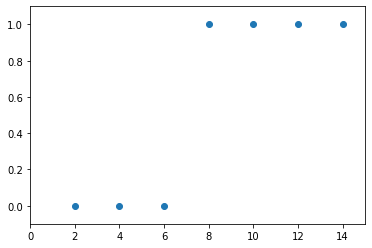

In [50]:
#################시그모이드 함수 ##############################################
data =[[2, 0], [4, 0],[6, 0],[8, 1],[10, 1],[12, 1], [14, 1]]
x = [i[0] for i in data]
y = [i[1] for i in data]

plt.scatter(x,y)
plt.xlim(0,15)
plt.ylim(-0.1,1.1)
plt.show()



In [51]:
#a, b 초기화 
a = 0
b = 0

#학습률 
lr = 0.05 

#시그모이드 함수 정의  1/(1+np.e ** (-x)) 
def sigmoid(x):
    return 1 / (1 + np.e ** (-x))

#경사 하강법  실행 
for i in range(2001):
    for x_data, y_data in data:
        a_diff = x_data*(sigmoid(a*x_data + b) - y_data) 
        b_diff = sigmoid(a*x_data + b) - y_data
        a = a - lr * a_diff
        b = b - lr * b_diff
        if i % 1000 == 0:     
            print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))


epoch=0, 기울기=-0.0500, 절편=-0.0250
epoch=0, 기울기=-0.1388, 절편=-0.0472
epoch=0, 기울기=-0.2268, 절편=-0.0619
epoch=0, 기울기=0.1201, 절편=-0.0185
epoch=0, 기울기=0.2374, 절편=-0.0068
epoch=0, 기울기=0.2705, 절편=-0.0040
epoch=0, 기울기=0.2860, 절편=-0.0029
epoch=1000, 기울기=1.4978, 절편=-9.9401
epoch=1000, 기울기=1.4940, 절편=-9.9411
epoch=1000, 기울기=1.4120, 절편=-9.9547
epoch=1000, 기울기=1.4949, 절편=-9.9444
epoch=1000, 기울기=1.4982, 절편=-9.9440
epoch=1000, 기울기=1.4984, 절편=-9.9440
epoch=1000, 기울기=1.4985, 절편=-9.9440
epoch=2000, 기울기=1.9065, 절편=-12.9489
epoch=2000, 기울기=1.9055, 절편=-12.9491
epoch=2000, 기울기=1.8515, 절편=-12.9581
epoch=2000, 기울기=1.9057, 절편=-12.9514
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513


In [53]:
##### XOR 문제 코드 구현 ####
wl1 = np.array([-2,-2])
wl2 = np.array([2,2])
w2 = np.array([1,1])
b1=3
b2=-1
b3 =-1

def MLP(x,w,b):
    y=np.sum(w*x) +b
    if y<=0:
        return 0
    else :
        return 1
    
def AND(x1,x2):
    return MLP(np.array([x1,x2]),w2,b3)

def OR(x1,x2):
    return MLP(np.array([x1,x2]),wl2,b2)

def NAND(x1,x2):
    return MLP(np.array([x1,x2]),wl1,b1)

def XOR(x1,x2):
    return AND((NAND(x1,x2)),OR(x1,x2))

for x in [(0,0),(1,0),(0,1),(1,1)]:
    y = XOR(x[0],x[1])
    print('입력값: '+str(x)+"출력값: "+str(y))

입력값: (0, 0)출력값: 0
입력값: (1, 0)출력값: 1
입력값: (0, 1)출력값: 1
입력값: (1, 1)출력값: 0


In [58]:
# 폐암 수술 환자의 생존률

np.random.seed(0)
tf.random.set_seed(0)

data = np.loadtxt("C:/Users/손은주/Multicampus/part2/dataset/ThoraricSurgery.csv", delimiter=",")

In [59]:
X = data[:,0:17]
Y = data[:,17]
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',optimizer='adam')
metrics = ['accuracy']
model.fit(X,Y,epochs=100, batch_size=10)

Epoch 1/100
470/470 [==============================] - 0s 618us/step - loss: 0.6635
Epoch 2/100
470/470 [==============================] - 0s 138us/step - loss: 0.1488
Epoch 3/100
470/470 [==============================] - 0s 142us/step - loss: 0.1488
Epoch 4/100
470/470 [==============================] - 0s 132us/step - loss: 0.1488
Epoch 5/100
470/470 [==============================] - 0s 151us/step - loss: 0.1488
Epoch 6/100
470/470 [==============================] - 0s 151us/step - loss: 0.1487
Epoch 7/100
470/470 [==============================] - 0s 140us/step - loss: 0.1487
Epoch 8/100
470/470 [==============================] - 0s 146us/step - loss: 0.1487
Epoch 9/100
470/470 [==============================] - 0s 144us/step - loss: 0.1487
Epoch 10/100
470/470 [==============================] - 0s 121us/step - loss: 0.1486
Epoch 11/100
470/470 [==============================] - 0s 134us/step - loss: 0.1498
Epoch 12/100
470/470 [==============================] - 0s 131us/step - lo